## Feature Engineering

What is feature engineering?
- using the domain knowledge, it is a process to extract features from raw data via data mining techniques. 
- IN general, we can take a look at three different approaches:
  - extract info
  - combine info
  - transform info

### Outliers
it is important to remove these outliers in order to have a more generalised model. 

But what do we consider an outlier? We can define an outlier based
- **range and limits of an outlier**: we can define/do this using several approaches:
  - InterQuartile Range: we can define that any data that falls beyong n*IQR is an outlier, but the n will depend on the data distribution we are dealing with. 
  - Standard Deviation: If we have normlalised data, we can define a range in terms of n*std. 
  - Visualised or Domain Limit Values: using visulaised plots or domain knowledge to set a threshold value. 
- percentage of data: depending on the above discussed approaches, if a majority percentage of the data is defined as outliers, then they are not really outliers but the data itself. So its always wise to limit outliers to a few percentage of data. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_ages(mu=50, sigma=13,n_samples=100,seed=42):

    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu, scale=sigma, size=n_samples)
    sample_ages = np.round(sample_ages, decimals=0)

    return sample_ages

<Axes: >

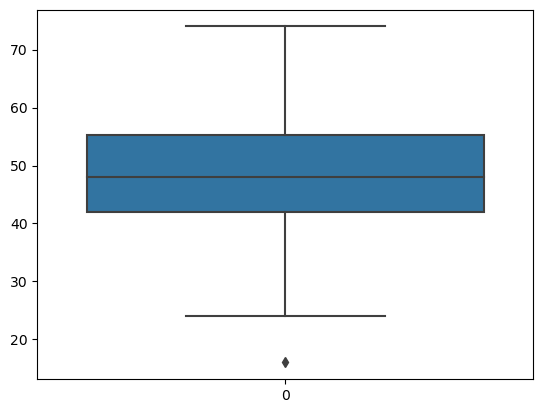

In [3]:
sample = create_ages()
sns.boxplot(data = sample)
# The box plot below shows that for the normally generated samples here, we have an outlier
# This is based on the inbuilt IQR based system of Seaborn, where anything below or beyong 1.5*IQR is outlier.
# Mathematically, how can we extract this?

In [4]:
sample_ser = pd.Series(sample)
sample_ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

### Definition Recall:
**IQR**: Interquartile range is the values that lie between 75th percentile and 25th

In [5]:
IQR = 55.25 - 42
lower_age = 42 - 1.5*(IQR)
upper_age = 55.25 + 1.5*(IQR)

# Instead of manually finind the quartile or the percentile value we can use numpy method as follows
# q75, q25 = np.percentile(sample, [75,25])
# IQR = q75 - q25

print(lower_age, upper_age)
# Based on these limits now, we can extract our data and get rid of outliers. 

22.125 75.125


It is important to note that the method shown above is not the only method to get rid of outliers. We can use many different methods based on the application we are working on and the domain knowledge. We can use std, mean thresholding, IQR, etc. 

In [6]:
df = pd.read_csv('../Ames_Iowa_Dataset/AmesHousing.csv')

- **Correlation**: visualising highly correlated data helps us in understanding our data more. When we visualise highly correlated data, we are easily able to narrow down the outliers in it.  

In [7]:
df.corr()['SalePrice'].sort_values()

/tmp/ipykernel_3740538/4269891110.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

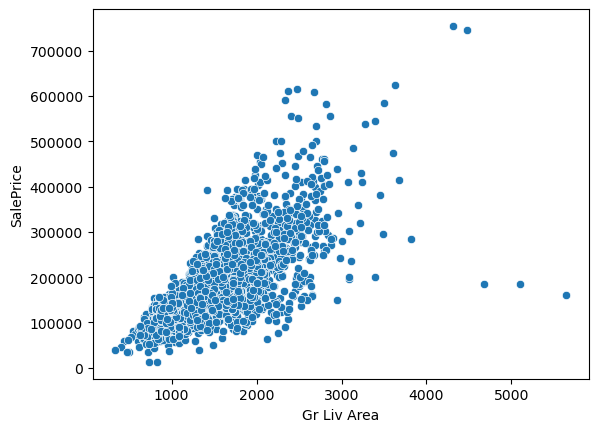

In [8]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [9]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [10]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

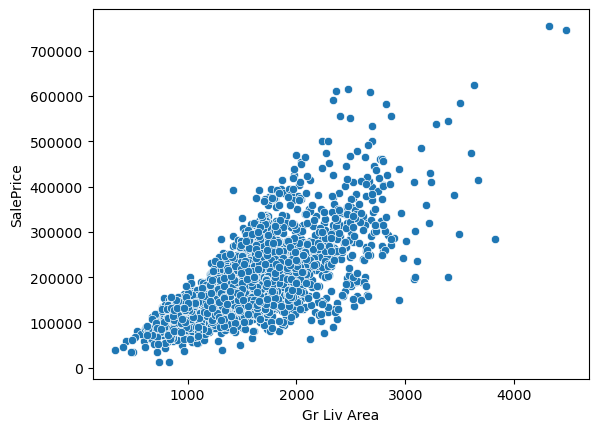

In [11]:
drop_index = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df = df.drop(drop_index, axis=0)

sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [21]:
df.to_csv('../Ames_Iowa_Dataset/AmesHousing_droppedOutliers.csv', index=False)

### Evaluation of Missing Data



In [12]:
# We are dropping the PID since we already have indices as the unique identifier
df = df.drop('PID', axis=1)

In [13]:
# Returns the df with Boolean vals, True if value is null, False if not null.
#df.isnull()

df.isnull().sum() # This will return the number of missing values in a dataframe col-wise
# If we want to find the % of the total df that we are missing we can use the following or create a function that returns us the % of missing data col-wise
# 100 * df.isnull()sum() / len(df)

Order               0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [16]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [17]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Total Bsmt SF'),
  Text(3, 0, 'Bsmt Unf SF'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Qual'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

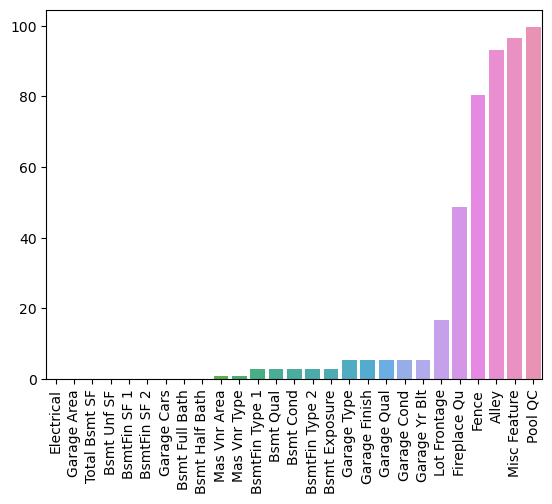

In [19]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

Instead of focusing on the higher percentage data first, let us first think of the lower percentage.
We can easily drop some rows with missing values from the dataframe. ANd then based on the description from the documentation we can decide if we want to entirely drop the higher percentage data or do we need to simply replace the null values to zero or something.

In [20]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [22]:
df[df['Electrical'].isnull()]['Garage Area']

1577    400.0
Name: Garage Area, dtype: float64

In [23]:
df[df['Bsmt Half Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


For dropping the row we can use df.dropna(axis=0, subset=[list of column names])

In [24]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Cars'])

In [26]:
percent_nan = percent_missing(df)
percent_nan = percent_nan[percent_nan<1]
percent_nan 

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [28]:
df[df['Bsmt Full Bath'].isnull()]['Bsmt Half Bath']

1341   NaN
1497   NaN
Name: Bsmt Half Bath, dtype: float64

Because the null values are all around the properties linked with Basement, one assumption could easily be that the house does not have a basement. 

Based on the domain knowledge, and the dataset description text, we know that Null values mean that the house does not have a basement. Hence, instead of dropping these rows, we can simply replace the Null values with relevant values.

In case of replacement, we also need to think about the col's datatype-
- in case of numeric datatype, we can replace null with 0
- in case of categorical datatype, we can replace null with None

In [29]:
# BSMT numeric cols -> fillna 0 
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# BSMT string cols -> fillna None
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

/tmp/ipykernel_3740538/3466457632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
/tmp/ipykernel_3740538/3466457632.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [33]:
percent_nan = percent_missing(df)
percent_nan

Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

In [34]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

percent_nan = percent_missing(df)
percent_nan

/tmp/ipykernel_3740538/3094837513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
/tmp/ipykernel_3740538/3094837513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')


Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64